In [31]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\joal\Documents\Universidad-J\2º\Métodos Numéricos II\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [32]:
import math

In [33]:
from numpy import diag, ones, linspace, array

In [34]:
import ipywidgets

Estamos considerando la ecuación de convección-difusión en $1$ dimensión:

$$
cu'(x) - D u''(x) = f(x)
$$

Para $x \in [a,b]$, $u(a) = u_a$ y $u(b) = u_b$.

Donde $c$ es el vector de transporte, el coeficiente de convección y $n$ es el número de nodos interiores.

In [35]:
def conv_difus_1d(f, c, D, ua, ub, n, a=0, b=1):
    
    h = (b - a)/(n + 1) 
    Pe = (c*h)/(2*D)
# El tamaño del paso

### 1. Matriz

    c0 = 2+2*Pe # Coeficiente diagonal a_ii

    c_minus = -(1+2*Pe) # Coeficiente debajo de la diagonal a_{i-1,i}
    c_plus = -1 # Coeficiente encima de la diagonal a_{i+1,i}

    A_h =  (c0*diag(ones(n)) + c_plus*diag(ones(n-1),+1) + c_minus*diag(ones(n-1),-1))

### 2. Segundo miembro

    f_h = []
    x = linspace(0, 1, num=n+2) # x_0, ..., x_{n-1}
    x_interior = x[1:n+1]

    f_h = f(x_interior) # f_h es el vector resultante de aplicar f a cada elemento del vector x
    f_h[0] += ua*(-1-2*Pe)
    f_h[-1] += ub*(-1)

### 3. Resolución del sistema
    from numpy.linalg import solve
    u_h = solve(A_h, f_h)

# Concatenamos la solución con los datos en los extremos del intervalo 

    u = array( [ua] + list(u_h) + [ub] )

# Devolvemos la partición x y la solución obtenida

    return x, u

In [36]:
def solucion(c=0, n=21):
    """
    Función que será usada por 'interact' para llamar a la función anterior 'conv_difus_1d'
    """
    f = lambda x: 0 + 0*x
    x_h, u_h = conv_difus_1d(f, c, 1, ua=0, ub=1, n=n)
    U = lambda x: (exp(c/D)-1)**(-1)*(exp(c*x/D)-1)
    
    from matplotlib.pylab import plot, show, grid, legend
    x = linspace(0, 1, 100)
    plot(x, U(x), label = "Solución exacta", linewidth=3, color="blue")
    plot(x_h, u_h,"--", label = "Solución aproximada", linewidth=3, color="green")
    grid()
    legend()
    show()
    

In [37]:
# Mostrar barras de desplazamiento para elegir los valores c y n

C:\Users\joal\Documents\Universidad-J\2º\Métodos Numéricos II\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\joal\Documents\Universidad-J\2º\Métodos Numéricos II\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in multiply


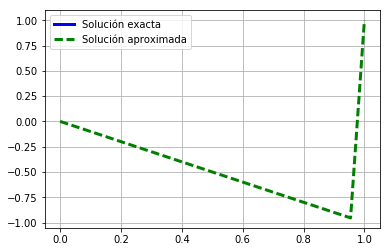

<function __main__.solucion>

In [38]:
ipywidgets.interact(solucion, c=(0,200,10), n=(1,81,2))

In [39]:
c=1;
D=1;

In [40]:
def U(x): return (exp(c/D)-1)**(-1)*(exp(c*x/D)-1)

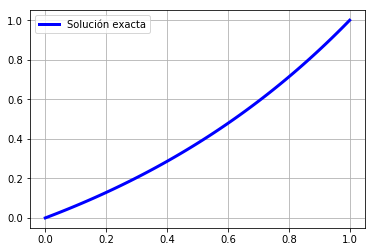

In [41]:
x = linspace(0, 1, 100);
plot(x, U(x), label = "Solución exacta", linewidth=3, color="blue")
grid()
legend()
show()

C:\Users\joal\Documents\Universidad-J\2º\Métodos Numéricos II\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\numpy\core\numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
C:\Users\joal\Documents\Universidad-J\2º\Métodos Numéricos II\WinPython-64bit-3.6.0.1Qt5\python-3.6.0.amd64\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


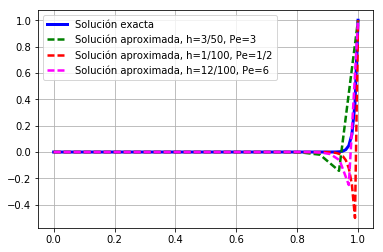

In [53]:
f = lambda x: 0 + 0*x
x_h, u_h = conv_difus_1d(f, 100, 1, ua=0, ub=1, n=47/3)
x_j, u_j = conv_difus_1d(f, 100, 1, ua=0, ub=1, n=99)
x_k, u_k = conv_difus_1d(f, 100, 1, ua=0, ub=1, n=97/3)
x = linspace(0, 1, 100)
c=100;
D=1;
def U(x): return (exp(c/D)-1)**(-1)*(exp(c*x/D)-1)
plot(x, U(x), label = "Solución exacta", linewidth=3, color="blue")
plot(x_h, u_h,"--", label = "Solución aproximada, h=3/50, Pe=3", linewidth=2.5, color="green")
plot(x_j, u_j,"--", label = "Solución aproximada, h=1/100, Pe=1/2", linewidth=2.5, color="red")
plot(x_k, u_k,"--", label = "Solución aproximada, h=12/100, Pe=6", linewidth=2.5, color="magenta")
grid()
legend()
show()